# Problem Set 3

**AS.171.402: Applied Quantum Information (Spring 2022)**

**Due Date: March 15, 2022**

In [61]:
import qiskit as qk
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
from qiskit import IBMQ
%matplotlib inline

import matplotlib.pyplot as plt

# Problem 1

In [3]:
num_qubits = 3
num_variables= num_qubits
qr_x = qk.QuantumRegister(num_qubits, name='q')
qr_a = qk.QuantumRegister(1, name='a')
cr = qk.ClassicalRegister(num_variables, name='c')

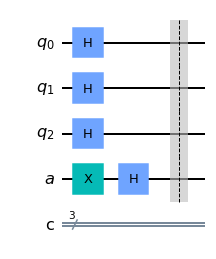

In [162]:
state_prep = qk.QuantumCircuit(qr_x, qr_a, cr)
# --- Insert state preparation circuit here ---
state_prep.x(qr_a)
state_prep.h(qr_a)
state_prep.h(qr_x)
state_prep.barrier()
state_prep.draw('mpl', fold=-1)

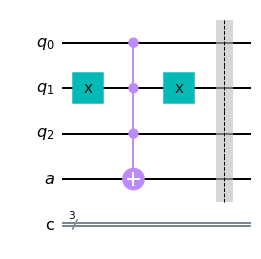

In [163]:
oracle = qk.QuantumCircuit(qr_x, qr_a, cr)
# --- Insert oracle circuit here ---
oracle.x(1)
oracle.mcx([0,1,2], 3)
oracle.x(1)
oracle.barrier()
oracle.draw('mpl', fold=-1)

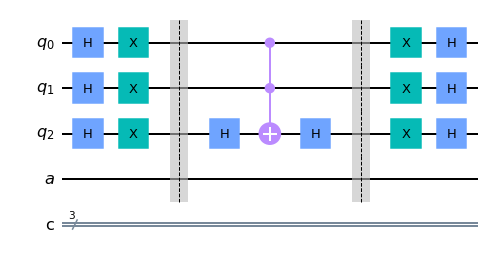

In [164]:
diffuser = qk.QuantumCircuit(qr_x, qr_a, cr)
# --- Insert diffuser circuit here ---
diffuser.h(qr_x)
diffuser.x(qr_x)    
diffuser.barrier()
diffuser.h(2)
diffuser.mcx([0,1],2)
diffuser.h(2)
diffuser.barrier()
diffuser.x(qr_x)
diffuser.h(qr_x)
diffuser.draw('mpl', fold=-1)

In [165]:
def grover_circ(k):
    grover = qk.QuantumCircuit(qr_x, qr_a, cr)
    grover.compose(state_prep, inplace=True)
    for i in range(0,k):
        grover.compose(oracle, inplace=True)
        grover.compose(diffuser, inplace=True)
    # -- Insert correct measurement operations here ---
    grover.measure([0,1,2],[0,1,2])
    return grover

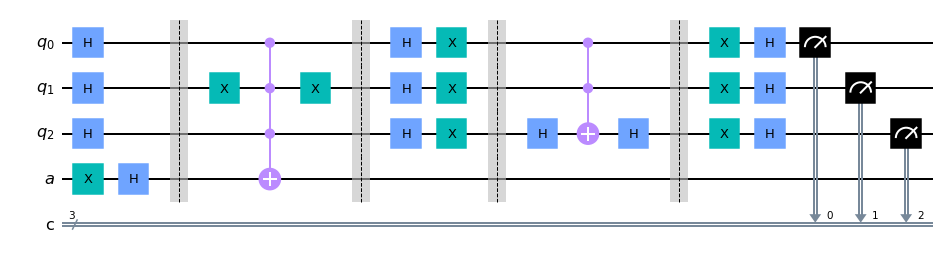

In [166]:
grover_circ(1).draw('mpl', fold=-1)

## Part (d)

Below, plot the probability of being in the marked state as a function of the number of Grover iterations $k$

'Probability of Measuring Marked state as a function of K iterations of Grovers Search'

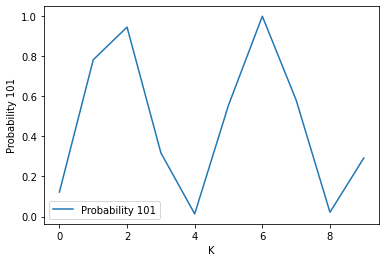

In [102]:
shots = 5000
backend = Aer.get_backend('qasm_simulator')
k = range(0,10,1)
counts=[]
for i in k:
    temp = grover_circ(i)
    job = qk.execute(temp, backend=backend, shots=shots)
    results = job.result()
    counts.append(results.get_counts()['101']/5000)
#plot_histogram(counts)
plt.plot(k,counts,label=r'Probability 101')
plt.xlabel('K')
plt.ylabel('Probability 101')
plt.legend()
'''Probability of Measuring Marked state as a function of K iterations of Grovers Search'''

# Problem 2

In [103]:
num_variables = 3
num_clauses = 5
qr_x = qk.QuantumRegister(num_variables, name='q')
qr_r = qk.QuantumRegister(num_clauses, name='r')
qr_a = qk.QuantumRegister(1, name='a')
cr = qk.ClassicalRegister(num_variables, name='c')

## Part (a)

Below, create a circuit that constructs the 3-SAT oracle. Draw the oracle using Qiskit's built-in functions.

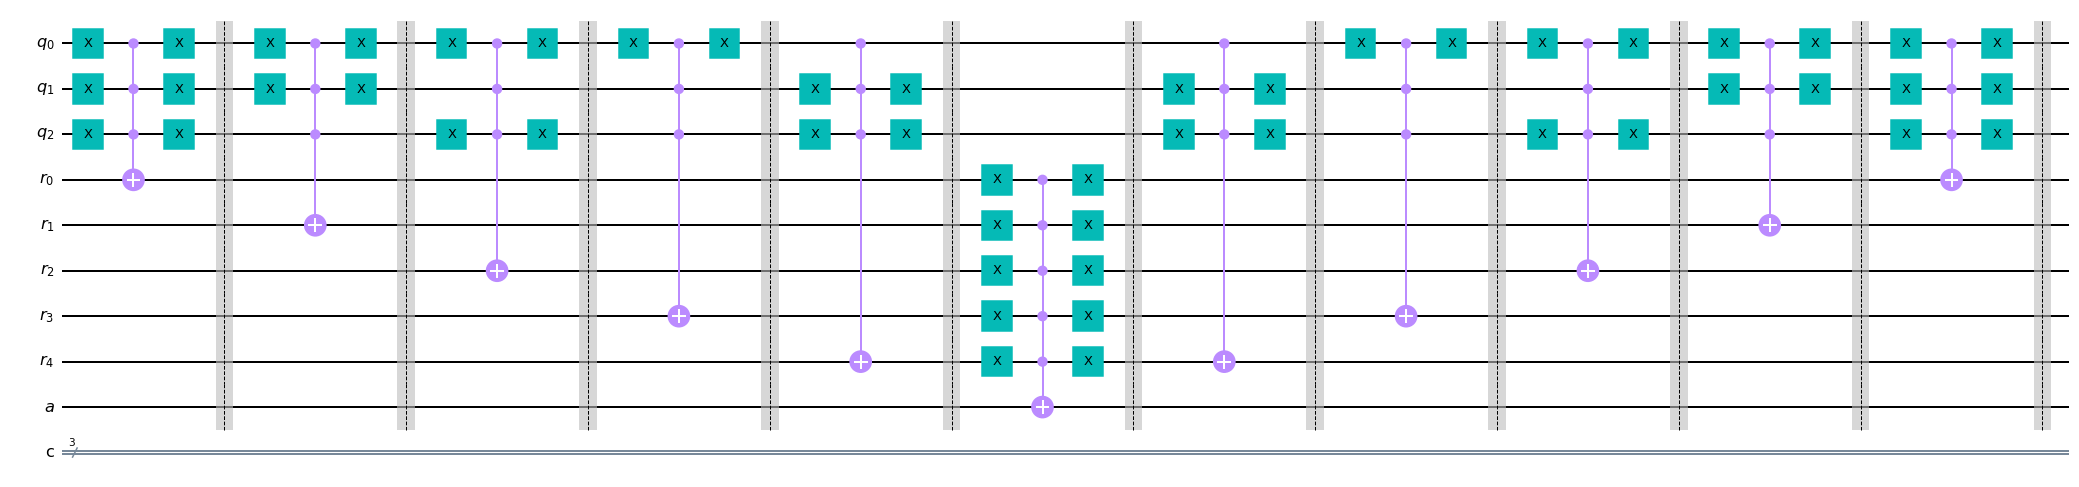

In [186]:
oracle = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
# --- Insert oracle circuit here ---
oracle.x([0,1,2])
oracle.mcx([0,1,2], 3)
oracle.x([0,1,2])
oracle.barrier()
oracle.x([0,1])
oracle.mcx([0,1,2], 4)
oracle.x([0,1])
oracle.barrier()
oracle.x([0,2])
oracle.mcx([0,1,2], 5)
oracle.x([0,2])
oracle.barrier()
oracle.x([0])
oracle.mcx([0,1,2], 6)
oracle.x([0])
oracle.barrier()
oracle.x([1,2])
oracle.mcx([0,1,2], 7)
oracle.x([1,2])
oracle.barrier()
oracle.x([3,4,5,6,7])
oracle.mcx([3,4,5,6,7], 8)
oracle.x([3,4,5,6,7])
oracle.barrier()
oracle.x([1,2])
oracle.mcx([0,1,2], 7)
oracle.x([1,2])
oracle.barrier()
oracle.x([0])
oracle.mcx([0,1,2], 6)
oracle.x([0])
oracle.barrier()
oracle.x([0,2])
oracle.mcx([0,1,2], 5)
oracle.x([0,2])
oracle.barrier()
oracle.x([0,1])
oracle.mcx([0,1,2], 4)
oracle.x([0,1])
oracle.barrier()
oracle.x([0,1,2])
oracle.mcx([0,1,2], 3)
oracle.x([0,1,2])
oracle.barrier()
oracle.draw('mpl', fold=-1)

## Part (b)

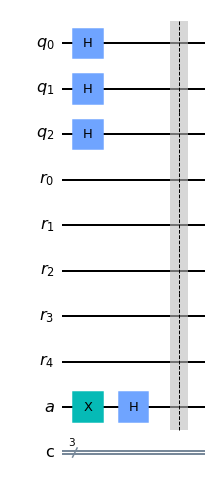

In [187]:
state_prep = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
# --- Insert state preparation circuit here ---
state_prep.x(qr_a)
state_prep.h(qr_a)
state_prep.h(qr_x)
state_prep.barrier()
state_prep.draw('mpl', fold=-1)

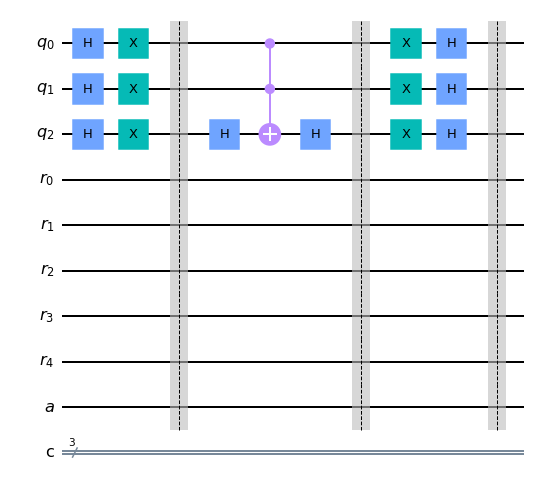

In [188]:
diffuser = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
# --- Insert diffuser circuit here ---
diffuser.h(qr_x)
diffuser.x(qr_x)    
diffuser.barrier()
diffuser.h(2)
diffuser.mcx([0,1],2)
diffuser.h(2)
diffuser.barrier()
diffuser.x(qr_x)
diffuser.h(qr_x)
diffuser.barrier()
diffuser.draw('mpl', fold=-1)

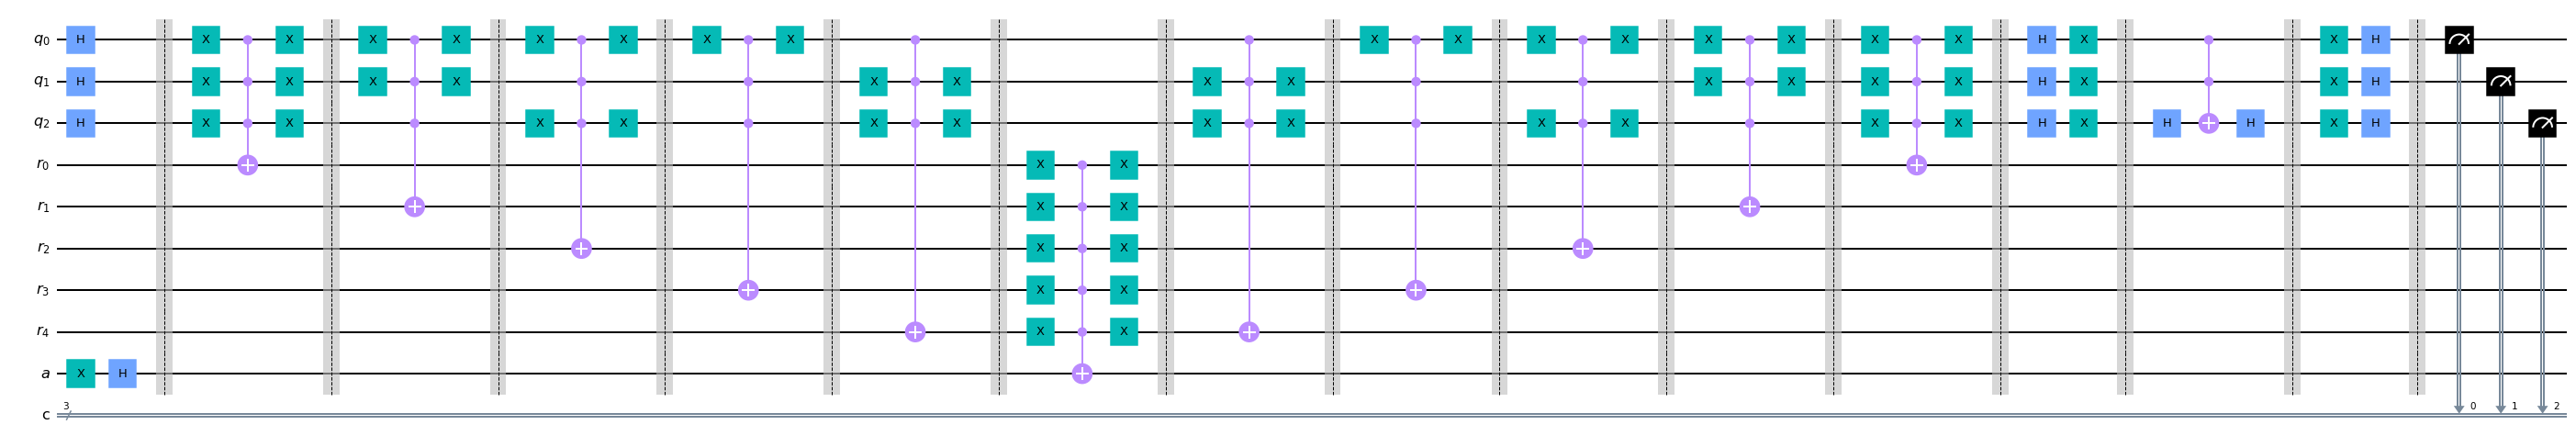

In [189]:
grover_3sat = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
grover_3sat.compose(state_prep, inplace=True)
grover_3sat.compose(oracle, inplace=True)
grover_3sat.compose(diffuser, inplace=True)
# -- Insert correct measurement operations here ---
grover_3sat.measure([0,1,2],[0,1,2])
grover_3sat.draw('mpl', fold=-1)

Below, run a simulation of the Grover Algorithm

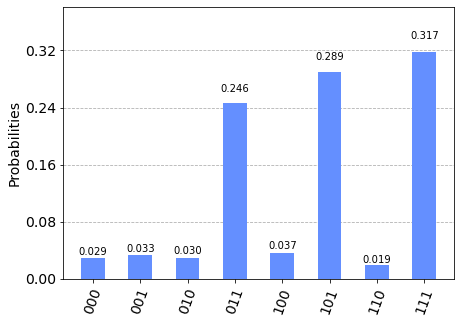

In [190]:
shots = 1000
backend = Aer.get_backend('qasm_simulator')
job = qk.execute(grover_3sat, backend=backend, shots=shots)
results = job.result()
counts = results.get_counts(grover_3sat)
plot_histogram(counts)

## Part (c)

Plot the cumulative probability for the solution states as a function of $k$. Hint: Take a look at the section "Implementation", subsection "Multiple Iterations", subsubsection "Cumulative Probability" in example_2sat.ipynb

In [195]:
def grover_3sat_circ(k):
    grover_sat = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
    grover_sat.compose(state_prep, inplace=True)
    for i in range(0,k):
        grover_sat.compose(oracle, inplace=True)
        grover_sat.compose(diffuser, inplace=True)
    # -- Insert correct measurement operations here ---
    grover_sat.measure([0,1,2],[0,1,2])
    return grover_sat

In [217]:
job = qk.execute(temp, backend=backend, shots=shots)
results = job.result()
print(results.get_counts())

{'100': 205, '001': 206, '000': 203, '010': 206, '110': 179, '111': 1}


'Probability of Measuring Marked state as a function of K iterations of Grovers Search'

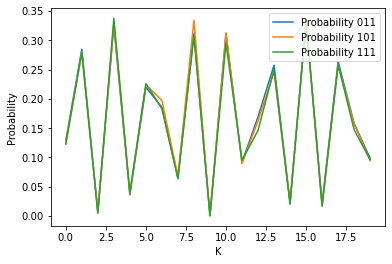

In [232]:
shots = 5000
backend = Aer.get_backend('qasm_simulator')
k = range(0,20,1)
count_011=[]
count_101=[]
count_111=[]
for i in k:
    temp = grover_3sat_circ(i)
    job = qk.execute(temp, backend=backend, shots=shots)
    results = job.result()
    count_011.append(float(results.get_counts()['011'])/5000)
    count_101.append(float(results.get_counts()['101'])/5000)
    count_111.append(float(results.get_counts()['111'])/5000)
plt.plot(k,count_011,label=r'Probability 011')
plt.plot(k,count_101,label=r'Probability 101')
plt.plot(k,count_111,label=r'Probability 111')
plt.xlabel('K')
plt.ylabel('Probability')
plt.legend()
'''Probability of Measuring Marked state as a function of K iterations of Grovers Search'''

0 	 0.3764
1 	 0.8430000000000001
2 	 0.0194
3 	 0.9913999999999998
4 	 0.1154
5 	 0.6698
6 	 0.5658
7 	 0.19699999999999998
8 	 0.9530000000000001
9 	 0.0026
10 	 0.9185999999999999
11 	 0.2764
12 	 0.4784
13 	 0.7534000000000001
14 	 0.0672
15 	 1.0
16 	 0.0562
17 	 0.7797999999999999
18 	 0.4618
19 	 0.2894


'Probability of Measuring solution as a function of K iterations of Grovers Search'

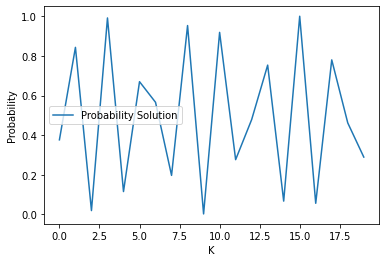

In [246]:
count=[]
for i in k: 
    count.append(count_011[i]+ count_101[i]+count_111[i])
    print(k[i],'\t',count[i])
plt.plot(k,count,label=r'Probability Solution')
plt.xlabel('K')
plt.ylabel('Probability')
plt.legend()
'''Probability of Measuring solution as a function of K iterations of Grovers Search'''

## Part (d)

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import depolarizing_error

In [252]:
# Add depolarizing error to the hadamard gates
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import NoiseModel
p = 0.004 # probability of depolarization
error = depolarizing_error(p, 1)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['h', 'x', 'sx'])

'Probability of Measuring Marked state as a function of K iterations of Grovers Search'

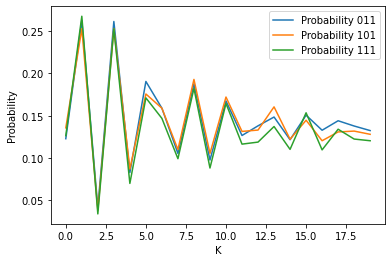

In [256]:
shots = 5000
backend = Aer.get_backend('qasm_simulator')
k = range(0,20,1)
count_011=[]
count_101=[]
count_111=[]
for i in k:
    temp = grover_3sat_circ(i)
    job = qk.execute(temp, backend=backend, shots=shots, noise_model=noise_model)
    results = job.result()
    count_011.append(float(results.get_counts()['011'])/5000)
    count_101.append(float(results.get_counts()['101'])/5000)
    count_111.append(float(results.get_counts()['111'])/5000)
plt.plot(k,count_011,label=r'Probability 011')
plt.plot(k,count_101,label=r'Probability 101')
plt.plot(k,count_111,label=r'Probability 111')
plt.xlabel('K')
plt.ylabel('Probability')
plt.legend()
'''Probability of Measuring Marked state as a function of K iterations of Grovers Search'''

0 	 0.38480000000000003
1 	 0.7824
2 	 0.1136
3 	 0.7666
4 	 0.2398
5 	 0.537
6 	 0.46440000000000003
7 	 0.3146
8 	 0.5626
9 	 0.2912
10 	 0.5038
11 	 0.3744
12 	 0.38980000000000004
13 	 0.44599999999999995
14 	 0.35400000000000004
15 	 0.4486
16 	 0.3628
17 	 0.4088
18 	 0.392
19 	 0.38079999999999997


'Probability of Measuring solution as a function of K iterations of Grovers Search'

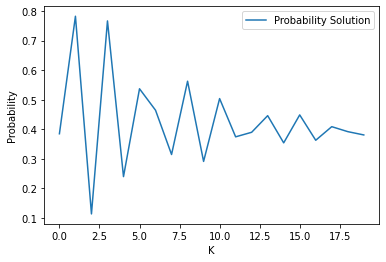

In [257]:
count=[]
for i in k: 
    count.append(count_011[i]+ count_101[i]+count_111[i])
    print(k[i],'\t',count[i])
plt.plot(k,count,label=r'Probability Solution')
plt.xlabel('K')
plt.ylabel('Probability')
plt.legend()
'''Probability of Measuring solution as a function of K iterations of Grovers Search'''

Plot the cumulative probability for the solution states as a function of $k$. Hint: Take a look at the section "Faulty Grover", subsection "Assuming Native Multi-Qubit Gates" in example_2sat.ipynb.

In [ ]:
num_qubits = 
qr = qk.QuantumRegister(num_qubits)
cr = qk.ClassicalRegister(num_qubits)

## Part (b)

In [ ]:
def state_prep():
    circ = qk.QuantumCircuit(qr, cr)
    # --- Insert state preparation circuit ---
    return circ

In [ ]:
def mixer(beta):
    circ = qk.QuantumCircuit(qr, cr)
    # --- Insert mixer circuit ---
    return circ

In [ ]:
def cost(gamma):
    circ = qk.QuantumCircuit(qr, cr)
    # --- Insert cost circuit ---
    return circ

In [ ]:
beta = Parameter('b')
gamma = Parameter('g')

qaoa_p1 = qk.QuantumCircuit(qr, cr)
qaoa_p1.compose(state_prep(), inplace=True)
qaoa_p1.compose(mixer(beta), inplace=True)
qaoa_p1.compose(cost(gamma), inplace=True)
# --- Insert measurement here ---

qaoa_p1.draw('mpl', fold=-1)

## Part (c)

Useful functions:

In [ ]:
def create_state_from_outcome(outcome):
    # Turns string of 0s and 1s into quantum state
    zero = np.array([[1],[0]])
    one = np.array([[0],[1]])
    
    state = np.array([[1]])
    for elem in outcome[::-1]: # reverse bit ordering to calculate state
        if elem == '0':
            state = np.kron(state, zero)
        else:
            state = np.kron(state, one)
    return state

In [ ]:
def expectation_value(counts, shots, Hc):
    # Computes expectation value with respect to Hc
    hc_matr = Hc.data # change to a numpy array
    exp_val = 0
    for outcome in counts.keys():
        state = create_state_from_outcome(outcome)
        prob = counts[outcome]/shots
        exp_val += prob*(state.conjugate().transpose() @ hc_matr @ state)
    return np.real(exp_val[0,0])

Code for varying $\beta$ and $\gamma$ and plotting $\langle H_C \rangle$ can be found in qaoa_example.ipynb.

## Part (d)

Code for finding the optimal $\beta$ and $\gamma$ can be found in qaoa_example.ipynb.